### Implementacja algorytmu losowania osobników stochastic universal sampling

In [1]:
# import numpy as np
import random
import matplotlib.pyplot as plt
import time
N = 100

In [2]:
## Stworzenie populacji (index, prob, cum_prob)
def create_population(N: int) -> list:
    population = []
    for i in range(N):
        individual = []
        individual.append(i)
        individual.append(random.random())
        population.append(individual)
    return population
    
population = create_population(N)
print(population)

def add_cum_prob(population: list) -> None:
    prob_sum = sum([u[1] for u in population])
    cum = 0
    for individual in population:
        cum += individual[1] / prob_sum
        individual.append(cum)
    population[-1][2] = 1.0
    
add_cum_prob(population)
print(population)

[[0, 0.8663214574651846], [1, 0.28483125324928016], [2, 0.7827898704814487], [3, 0.7525606286618225], [4, 0.16773656862403763], [5, 0.08598265166901997], [6, 0.23983562798228197], [7, 0.6206744057083564], [8, 0.8718663468114999], [9, 0.08592545405179441], [10, 0.9298810942722088], [11, 0.9166399276092732], [12, 0.1471985323338839], [13, 0.9474640025978783], [14, 0.7948261765109377], [15, 0.4010463883649914], [16, 0.28007109829123833], [17, 0.3009534160957825], [18, 0.46319506510431474], [19, 0.6258334717077568], [20, 0.5455458939646032], [21, 0.871476121438043], [22, 0.39696538276372184], [23, 0.11614033160570614], [24, 0.9170605193842558], [25, 0.3259058978762833], [26, 0.8730658192789699], [27, 0.15663615808475873], [28, 0.9631286168477873], [29, 0.8770461256021865], [30, 0.5364451516283459], [31, 0.5730100707989677], [32, 0.04132576193765425], [33, 0.20213350066815028], [34, 0.5919119036457122], [35, 0.7912475129005432], [36, 0.7715090612882863], [37, 0.228593294240638], [38, 0.0703

In [3]:
## Algorytm stochastic universal sampling
def mega_sus(population: list, lamb: int) -> list:
    step = 1/lamb
    r = random.uniform(0, step)
    mating_pool = []
    pointers = [r + i * step for i in range(lamb)]
    i = 0
    for p in pointers:
        while p > population[i][2]:
            i += 1
        mating_pool.append(population[i])
    return mating_pool

# for x in mega_sus(population, 5):
#     print(x)

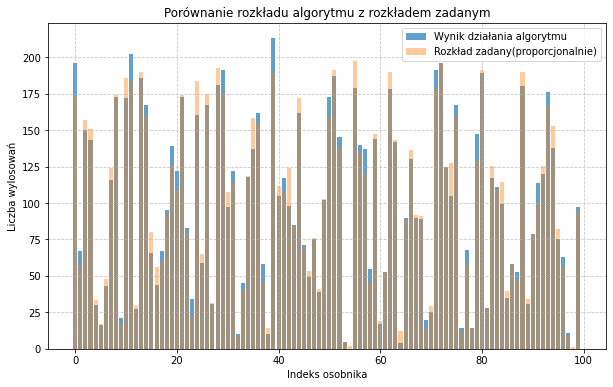

In [4]:
## Porównanie czy algorytm rzeczywiście odtwarza zadany rozkład prawdopodobieństwa 
liczba_losowan = 2000
wyniki = []
for _ in range(liczba_losowan): # będziemy mieli w sumie wylosowanych 10000 osobników, bo po 5 na każdą iterację 
    for x in mega_sus(population, 5):
        wyniki.append(x)

# Zliczenie wylosowań każdego osobnika
liczba_wylosowan = [0 for _ in range(N)]
for osobnik in wyniki:
    liczba_wylosowan[osobnik[0]] += 1

true_probs = [u[1] for u in population]

plt.figure(figsize=(10, 6))
plt.bar(range(N), liczba_wylosowan, alpha=0.7, label="Wynik działania algorytmu")
# Rozkład teoretyczny
plt.bar(range(N), [p*liczba_losowan*5*2/len(population) for p in true_probs], alpha=0.4, label="Rozkład zadany(proporcjonalnie)")
plt.xlabel('Indeks osobnika')
plt.ylabel('Liczba wylosowań')
plt.legend()
plt.title('Porównanie rozkładu algorytmu z rozkładem zadanym')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### Porównanie szybkości algorytmów

In [5]:
# Inicjalizacja wcześniejszych algorytmów
def algorytm1(populacja):
    count=0
    while True:
        count+=1
        calkowita_liczba_losowa = random.randint(0, N-1)
        rzeczywista_liczba_losowa = random.random()
        # print("=====")
        # print(f"Iteracja: {count}")
        # print(f"Całkowita liczba losowa: {calkowita_liczba_losowa}")
        # print(f"Rzeczywista liczba losowa: {rzeczywista_liczba_losowa}")
        # print("=====")
        for osobnik in populacja:
            if osobnik[0] == calkowita_liczba_losowa and osobnik[1] > rzeczywista_liczba_losowa:
                # print(f"Wylosowano osobnika {osobnik}, ponieważ {osobnik[1]} > {rzeczywista_liczba_losowa}")
                return osobnik
                break
            else:
                continue
    print("Nie wylosowano żadnego osobnika")

def algorytm2(populacja):
    cum_sum = sum(true_probs)
    cum_prob =0
    nowa_populacja=[]
    rzeczywista_liczba_losowa=random.random()
    for osobnik in populacja:
        cum_prob+=osobnik[1]
        norm_cum_prob = cum_prob/cum_sum
        osobnik=osobnik+(norm_cum_prob,)
        nowa_populacja.append(osobnik)
        if norm_cum_prob > rzeczywista_liczba_losowa:
            return osobnik
            break    

# Populacja tuplami z wcześniejszej pracy domowej (dla algorytmów 1 i 2)
def create_population_old(N):
    indexes = range(0, N)
    probability = []
    for i in indexes:
        probability.append(random.random())

    population = zip(indexes, probability)
    return list(population)

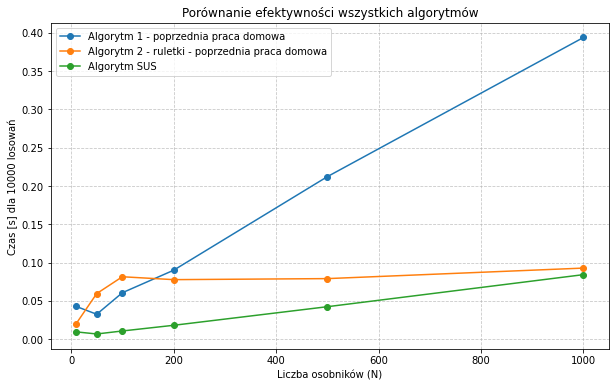

In [9]:
## Szybkość działania algorytmu
rozmiary_populacji = [10, 50, 100, 200, 500, 1000]
times1 = []
times2 = []
times3 = []
liczba_losowan = 10000
liczba_losowan2 = 2000

for N in rozmiary_populacji:
    population = create_population(N)
    populacja = create_population_old(N)
    add_cum_prob(population)

    start = time.time()
    for _ in range(liczba_losowan2): # wylosujemy 10000 osobników, po 5 na iterację
        for x in mega_sus(population, 5):
            wyniki.append(x)
    times1.append(time.time() - start)

    start = time.time()
    for _ in range(liczba_losowan): # wylosujemy 10000 osobników, po jednym na iterację
        algorytm1(populacja)
    times2.append(time.time() - start)

    start = time.time()
    for _ in range(liczba_losowan): # wylosujemy 10000 osobników, po jednym na iterację
        algorytm2(populacja)
    times3.append(time.time() - start)

plt.figure(figsize=(10,6))
plt.plot(rozmiary_populacji, times2, marker='o', label='Algorytm 1 - poprzednia praca domowa')
plt.plot(rozmiary_populacji, times3, marker='o', label='Algorytm 2 - ruletki - poprzednia praca domowa')
plt.plot(rozmiary_populacji, times1, marker='o', label='Algorytm SUS')
plt.xlabel('Liczba osobników (N)')
plt.ylabel(f'Czas [s] dla {liczba_losowan} losowań')
plt.legend()
plt.title('Porównanie efektywności wszystkich algorytmów')
plt.grid(linestyle='--', alpha=0.7)
plt.show()